In [2]:
# import modules
import myauz
from myauz.myalpha_funcs import (
    read_data,
    persist_data,
    update_csv,
    compose_portfolio,
    retrieveDF,
    string2date,
    retrievePF,
    initialize_df,
    time_sleep,
    create_path_list,
    refresh_db,
    get_daily_symbol,
)

from myauz.myalpha_libs_universal import StocksDb

import pprint


from datetime import date
import datetime


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib widget
import pprint
import seaborn as sns 
sns.set()
#sns.reset_orig

In [4]:
# initialize basic variables 

alphaDB = StocksDb()
alphaDB.check_path()
print("\n", alphaDB.api_key_alpha)


api_key_alpha = alphaDB.api_key_alpha
root_path = alphaDB.path
print('root_path: ',root_path)

read_from_alphavantage = False
rename_column = True


usecols = ["timestamp", "adjusted_close"]
startd = "2014-03-27"
endd = "2020-09-17"

print('usecols:', usecols)
print('startd',startd)
print('endd',endd)



Directory  ../data  already exists

 77K8XPSR3XWWZJ80
root_path:  ..
usecols: ['timestamp', 'adjusted_close']
startd 2014-03-27
endd 2020-09-17


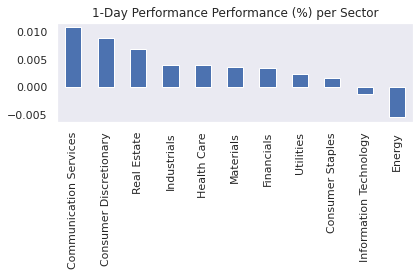

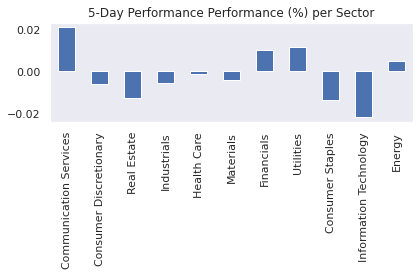

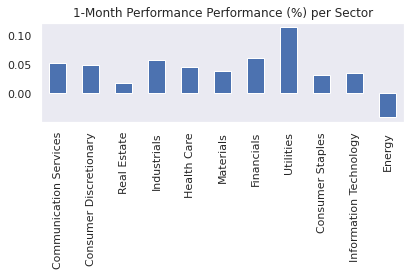

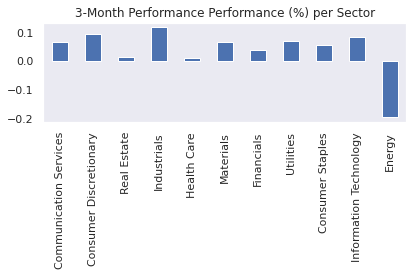

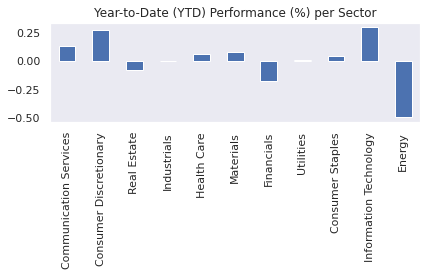

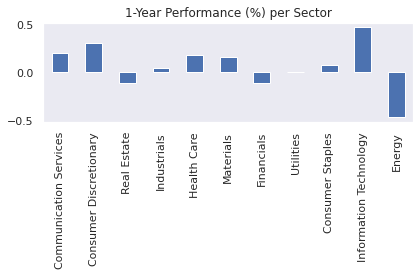

['Rank A: Real-Time Performance',
 'Rank B: 1 Day Performance',
 'Rank C: 5 Day Performance',
 'Rank D: 1 Month Performance',
 'Rank E: 3 Month Performance',
 'Rank F: Year-to-Date (YTD) Performance',
 'Rank G: 1 Year Performance',
 'Rank H: 3 Year Performance',
 'Rank I: 5 Year Performance',
 'Rank J: 10 Year Performance']


<Figure size 432x288 with 0 Axes>

In [5]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt

sp = SectorPerformances(key=api_key_alpha, output_format='pandas')
data, meta_data = sp.get_sector()
data.head()


data['Rank B: Day Performance'].plot(kind='bar')
plt.title('1-Day Performance Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show();

data['Rank C: Day Performance'].plot(kind='bar')
plt.title('5-Day Performance Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show();

data['Rank D: Month Performance'].plot(kind='bar')
plt.title('1-Month Performance Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show();

data['Rank E: Month Performance'].plot(kind='bar')
plt.title('3-Month Performance Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show();

data['Rank F: Year-to-Date (YTD) Performance'].plot(kind='bar')
plt.title('Year-to-Date (YTD) Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show();

data['Rank G: Year Performance'].plot(kind='bar')
plt.title('1-Year Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show();


pprint.pprint([
    "Rank A: Real-Time Performance",
    "Rank B: 1 Day Performance",
    "Rank C: 5 Day Performance",
    "Rank D: 1 Month Performance",
    "Rank E: 3 Month Performance",
    "Rank F: Year-to-Date (YTD) Performance",
    "Rank G: 1 Year Performance",
    "Rank H: 3 Year Performance",
    "Rank I: 5 Year Performance",
    "Rank J: 10 Year Performance"
])


plt.clf()
plt.show()

In [6]:
plt.clf()
import matplotlib.pyplot as plt
import seaborn as sns 
#sns.set()
sns.reset_orig



<function seaborn.rcmod.reset_orig()>

<Figure size 432x288 with 0 Axes>

In [7]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies

cc = CryptoCurrencies(key=api_key_alpha, output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='EUR')


data.sort_values(by='date', ascending=True, inplace=True)
data = data['2020-01-01':]
data_filtered = data.loc[:,'4a. close (EUR)':'4b. close (USD)']

<AxesSubplot:xlabel='date'>

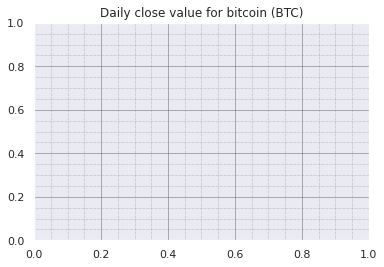

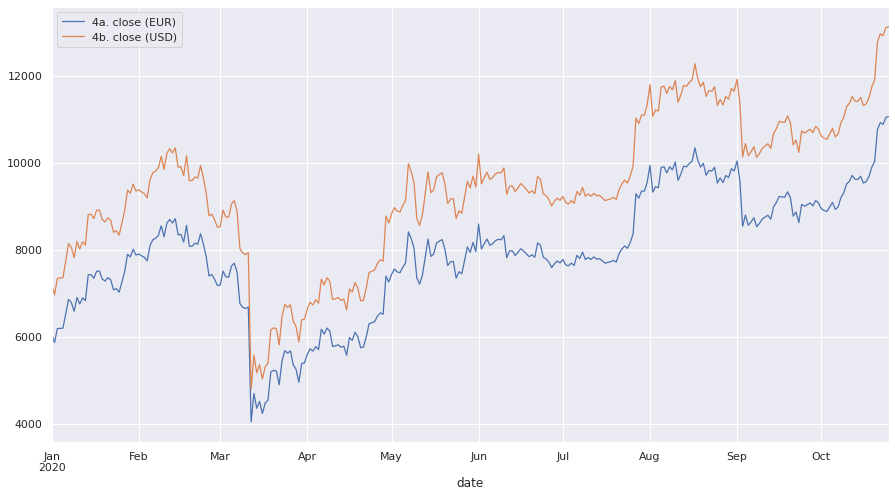

In [8]:
# Turn on the minor TICKS, which are required for the minor GRID


plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='dimgray')
# Customize the minor grid
plt.grid( which='minor', linestyle=':', linewidth='0.5', color='gray')

#plt.legend()
#plt.tight_layout()

plt.title('Daily close value for bitcoin (BTC)')

data_filtered.plot(figsize=(15,8), linewidth=1.25)







In [9]:
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint
cc = ForeignExchange(key=api_key_alpha)
# There is no metadata in this call
data, _ = cc.get_currency_exchange_rate(from_currency='EUR',to_currency='USD')
pprint(data)

{'1. From_Currency Code': 'EUR',
 '2. From_Currency Name': 'Euro',
 '3. To_Currency Code': 'USD',
 '4. To_Currency Name': 'United States Dollar',
 '5. Exchange Rate': '1.18610000',
 '6. Last Refreshed': '2020-10-25 16:38:01',
 '7. Time Zone': 'UTC',
 '8. Bid Price': '1.18609027',
 '9. Ask Price': '1.18612734'}
